In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Preprocessing

In [2]:
df=pd.read_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/cleaned_data.csv")
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483.0


Identifying the Outliers

In [3]:
df.select_dtypes(exclude = 'object').columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

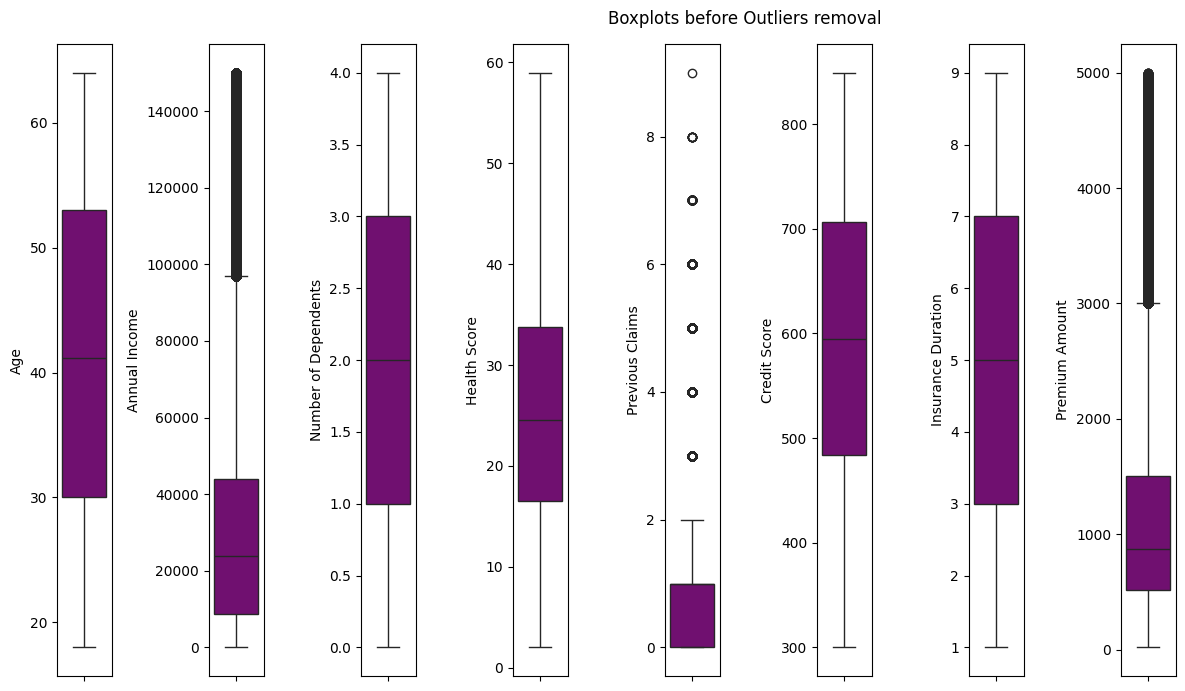

In [4]:
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score','Previous Claims', 'Credit Score', 'Insurance Duration','Premium Amount']

# Loop through numerical columns and create boxplots

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='purple')
    plt.tight_layout()

In [5]:
for col in numerical_cols:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


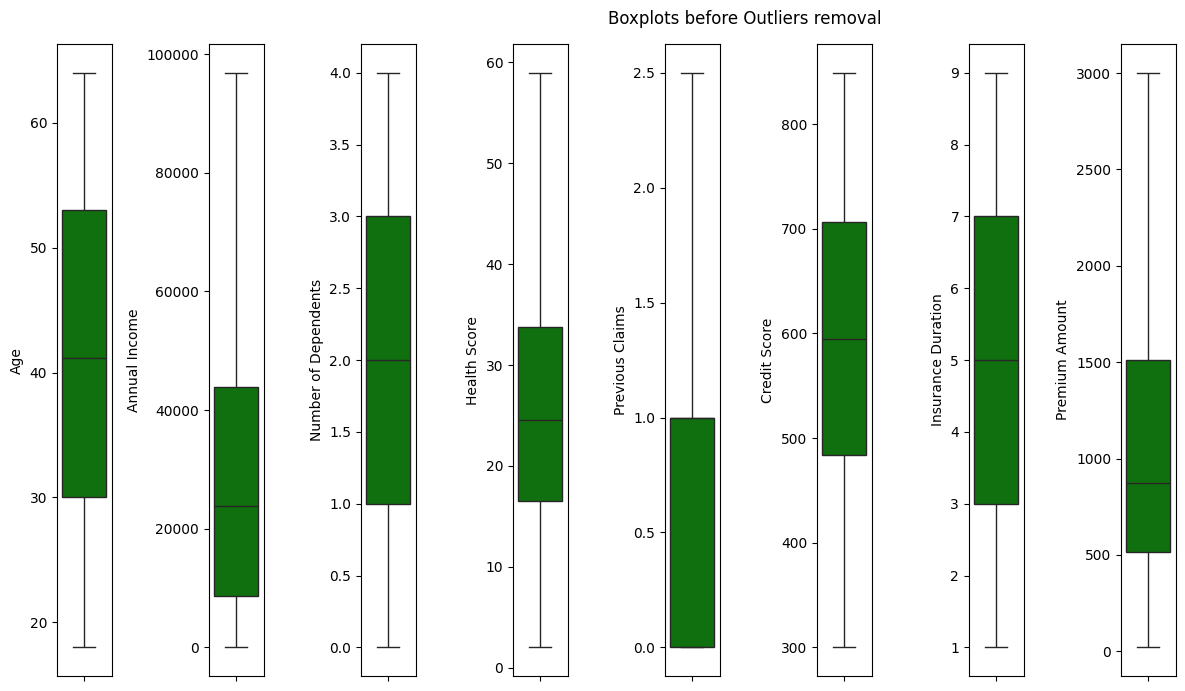

In [6]:
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score','Previous Claims','Credit Score', 'Insurance Duration','Premium Amount']

# Loop through numerical columns and create boxplots

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='green')
    plt.tight_layout()

In [7]:
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483.0


Skewness

In [8]:
# Select numerical columns only
num_cols = df.select_dtypes(include='number')
num_cols.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

Skewness of numerical columns:

Age                    -0.012631
Annual Income           1.065305
Number of Dependents   -0.011889
Health Score            0.307774
Previous Claims         0.321072
Vehicle Age            -0.020410
Credit Score           -0.126603
Insurance Duration     -0.008793
Premium Amount          0.872767
dtype: float64


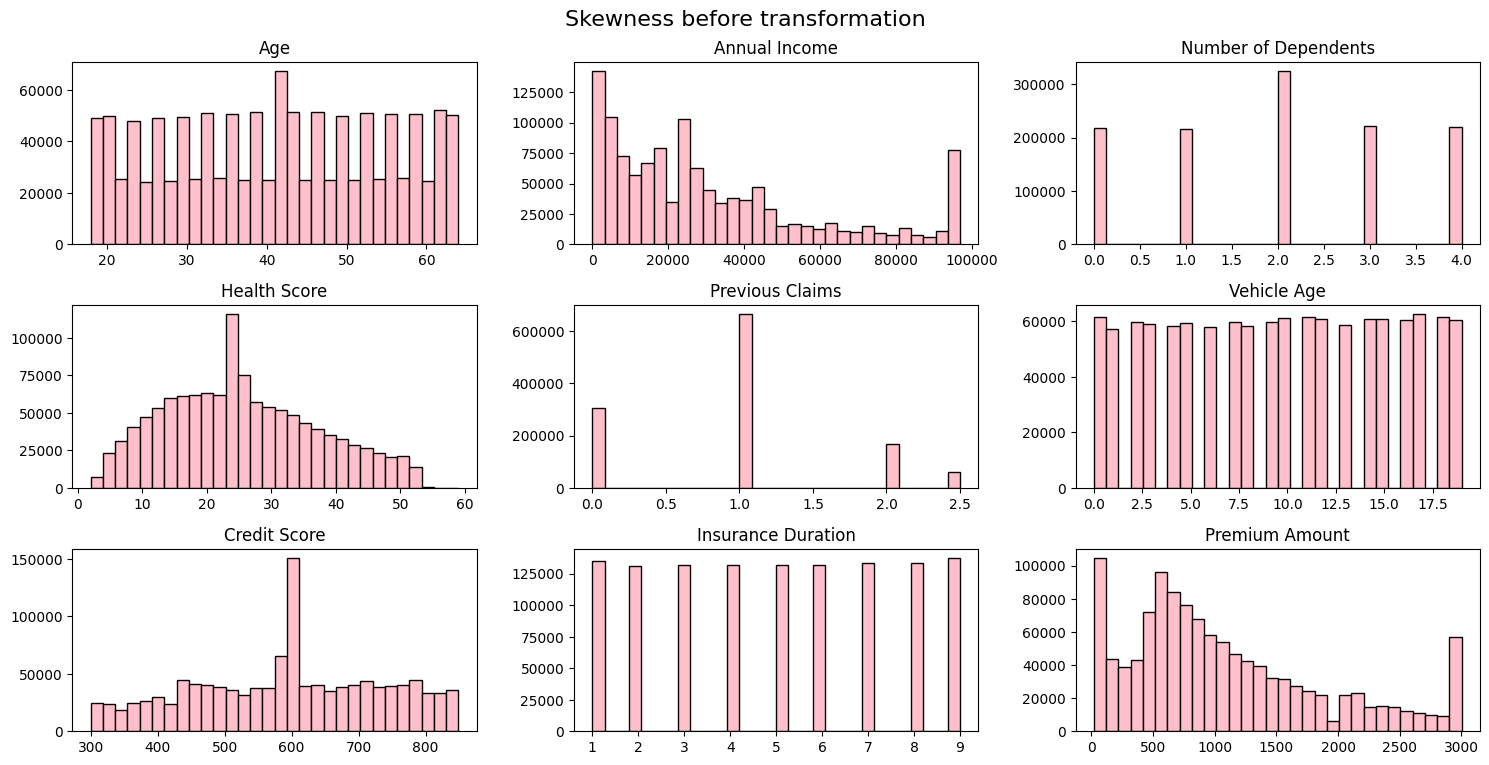

In [9]:
# Calculate skewness for each numerical column
skewness = num_cols.skew()

# Display skewness values
print("Skewness of numerical columns:\n")
print(skewness)

# Plot histograms before transformation
plt.figure(figsize=(15, 10))
plt.suptitle("Skewness before transformation", fontsize=16)

for idx, col in enumerate(num_cols.columns):
    plt.subplot(4, 3, idx + 1)
    plt.hist(df[col], bins=30, color='pink', edgecolor='black')
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()


In [10]:
# import numpy as np

# # Columns that are positively skewed
# pos_skewed_cols = ['Annual Income', 'Premium Amount']

# # Square Root Transformation
# df_sqrt = df[pos_skewed_cols].apply(lambda x: np.sqrt(x))

# # Log Transformation (log1p to handle zero values)
# df_log = df[pos_skewed_cols].apply(lambda x: np.log1p(x))

# # Cube Root Transformation
# df_cbrt = df[pos_skewed_cols].apply(lambda x: np.cbrt(x))

# for col in pos_skewed_cols:
#     df[f'{col}_sqrt'] = np.sqrt(df[col])
#     print((f'{col}_sqrt') ,':', (df[f'{col}_sqrt']).skew())
#     df[f'{col}_log'] = np.log1p(df[col])
#     print((f'{col}_log'),':', (df[f'{col}_log']).skew())
#     df[f'{col}_cbrt'] = np.cbrt(df[col])
#     print((f'{col}_cbrt'),':',(df[f'{col}_cbrt']).skew())


In [11]:

import numpy as np

# Columns that are positively skewed
pos_skewed_cols = ['Annual Income', 'Premium Amount']

# Apply Box-Cox transformation to positively skewed columns
# Note: Box-Cox requires values to be strictly positive, so ensure there are no zero or negative values.
df[pos_skewed_cols] = df[pos_skewed_cols].apply(lambda x:np.log1p(x + 1))  # Adding 1 to avoid zero values


Skewness of skewwed columns:

Annual Income    -1.112613
Premium Amount   -1.292928
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

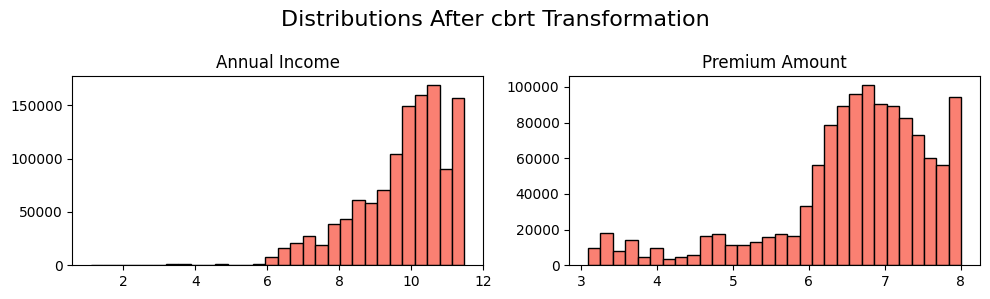

In [12]:
# Calculate skewness for each skewwed column
skewness = df[pos_skewed_cols].skew()

# Display skewness values
print("Skewness of skewwed columns:\n")
print(skewness)

# Plot histograms after transformation
plt.figure(figsize=(10, 3))
plt.suptitle("Distributions After cbrt Transformation", fontsize=16)

for idx, col in enumerate(pos_skewed_cols):
    plt.subplot(1, 2, idx + 1)
    plt.hist(df[col], bins=30, color='salmon', edgecolor='black')
    plt.title(f"{col}")
    plt.tight_layout()

plt.show


Encoding the categorical column to numerical

In [13]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

Nominal Columns

In [14]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [15]:
# One hot encoding
cat_col=['Gender','Policy Type','Smoking Status','Marital Status','Occupation','Location','Property Type']
# Define One-Hot Encoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')


# Fit and Transform
encoded_array = ohe.fit_transform(df[cat_col]).toarray()

# Convert Encoded Data to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cat_col))
encoded_df = encoded_df.astype(int)


# Concatenate with Original DataFrame (Drop Original Categorical Columns)
df = pd.concat([df.drop(columns=cat_col), encoded_df], axis=1)

In [16]:
ord_col=['Education Level','Exercise Frequency']
for i in ord_col:
    print(df[i].unique())

["Bachelor's" "Master's" 'High School' 'PhD']
['Weekly' 'Monthly' 'Daily' 'Rarely']


In [17]:
# Ordinal Encoding for Education Level, Customer Feedback and Location
education_order = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
df['Education Level'] = df['Education Level'].map(education_order)

exercise_order = {'Weekly':2,'Monthly':1, 'Daily':3, 'Rarely':0}
df['Exercise Frequency'] = df['Exercise Frequency'].map(exercise_order)

In [18]:
pd.set_option('display.max_columns', None)
df

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House
0,19.0,9.215427,1.0,1,22.598761,2.0,17.0,372.0,5.0,2,7.962416,0,0,1,0,1,0,1,0,0,1,0,1
1,39.0,10.363441,3.0,2,15.569731,1.0,12.0,694.0,2.0,1,7.303170,0,1,0,1,0,0,0,0,0,0,0,1
2,23.0,10.150504,3.0,0,47.177549,1.0,14.0,595.0,3.0,2,6.343880,1,0,1,1,0,0,1,0,1,0,0,1
3,21.0,11.481156,2.0,1,10.938144,1.0,0.0,367.0,1.0,3,6.642487,1,0,0,1,1,0,0,0,0,0,0,0
4,21.0,10.587922,1.0,1,20.376094,0.0,8.0,598.0,4.0,2,7.612831,1,0,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,10.215301,0.0,2,13.772907,1.0,5.0,372.0,3.0,3,7.173958,0,0,1,0,1,0,0,1,0,1,0,0
1199996,54.0,10.485368,2.0,2,11.483482,1.0,10.0,597.0,4.0,2,6.712956,1,1,0,0,0,0,1,0,0,0,0,0
1199997,19.0,10.856804,0.0,2,14.724469,0.0,19.0,595.0,6.0,1,5.921578,1,0,0,0,0,0,1,0,1,0,1,0
1199998,55.0,10.109810,1.0,3,18.547381,1.0,7.0,407.0,4.0,3,6.393591,1,0,1,0,0,1,0,0,1,0,0,0


In [19]:
df.dtypes

Age                          float64
Annual Income                float64
Number of Dependents         float64
Education Level                int64
Health Score                 float64
Previous Claims              float64
Vehicle Age                  float64
Credit Score                 float64
Insurance Duration           float64
Exercise Frequency             int64
Premium Amount               float64
Gender_Male                    int64
Policy Type_Comprehensive      int64
Policy Type_Premium            int64
Smoking Status_Yes             int64
Marital Status_Married         int64
Marital Status_Single          int64
Occupation_Self-Employed       int64
Occupation_Unemployed          int64
Location_Suburban              int64
Location_Urban                 int64
Property Type_Condo            int64
Property Type_House            int64
dtype: object

In [20]:
#Feature Engineering

# Function to classify credit score
def classify_credit_score(score):
    if score < 600:
        return  1 #poor
    elif score < 670:
        return  2 #fair
    elif score < 740:
        return  3 #good
    elif score < 800:
        return  4 #very good
    else:
        return  5 #excellent

# Apply classification
df[['credit_rating']] = df['Credit Score'].apply(lambda x: pd.Series(classify_credit_score(x)))



In [21]:
df.to_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/preprocessed_data.csv",index=False)
print("CSV Stored Successfully !!!")

CSV Stored Successfully !!!


In [22]:
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,credit_rating
0,19.0,9.215427,1.0,1,22.598761,2.0,17.0,372.0,5.0,2,7.962416,0,0,1,0,1,0,1,0,0,1,0,1,1
1,39.0,10.363441,3.0,2,15.569731,1.0,12.0,694.0,2.0,1,7.303170,0,1,0,1,0,0,0,0,0,0,0,1,3
